In [2]:
import torch

print(torch.__version__)

2.4.1+cu124


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
weight = 0.3
bias = 0.9

X = torch.arange(1,101)
Y = weight * X + bias

split = int(0.8 * len(X))

x_train, x_test = X[:split], X[split:]
y_train, y_test = Y[:split], Y[split:]

len(x_train), len(x_test), len(y_train), len(y_test)

(80, 20, 80, 20)

C:\Users\Trung Minh\AppData\Local\Temp\ipykernel_21428\1279099156.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train, y_train, cmap='r', s=4, label='Training data')
C:\Users\Trung Minh\AppData\Local\Temp\ipykernel_21428\1279099156.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_test, y_test, cmap='b', s=4, label='Test data')


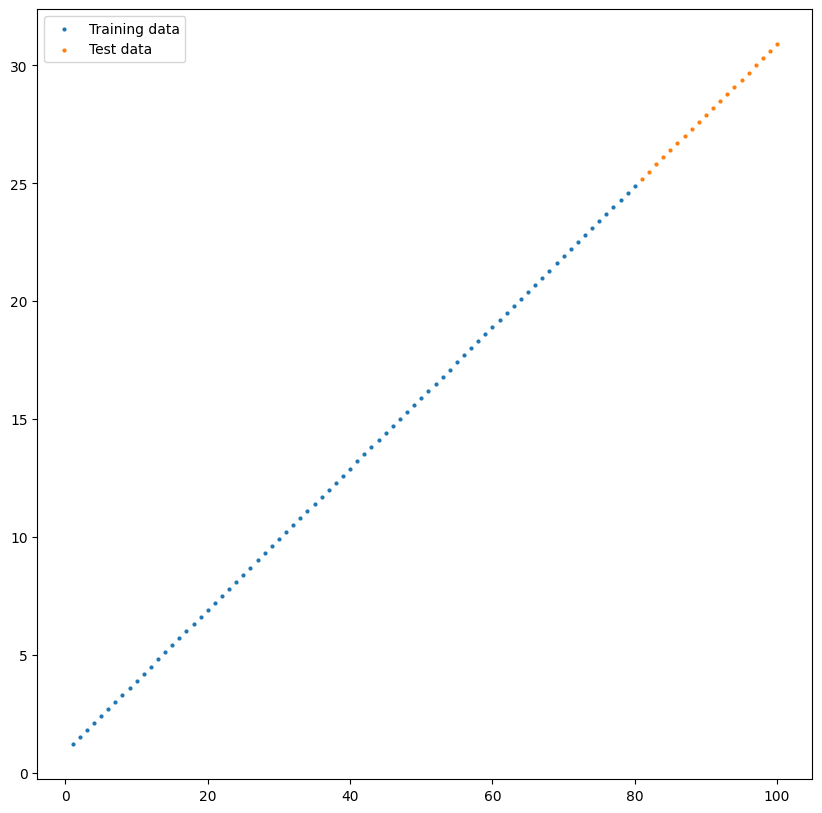

In [5]:
import matplotlib.pyplot as plt

def plot_train_test_data(x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, predictions=None):
    plt.figure(figsize=(10,10))
    
    plt.scatter(x_train, y_train, cmap='r', s=4, label='Training data')
    plt.scatter(x_test, y_test, cmap='b', s=4, label='Test data')
    
    if predictions is not None:
        plt.scatter(x_test, predictions, cmap='g', label='Predictions')
    
    plt.legend()
    
plot_train_test_data(x_train, x_test, y_train, y_test)

In [6]:
from torch import nn

class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, 
                                               dtype=torch.float,
                                               requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, 
                                             dtype=torch.float,
                                             requires_grad=True))
        
    def forward(self, x):
        return self.weight * x + self.bias

In [7]:
def set_seeds(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(42)

In [8]:
#set_seeds()

model = ClassificationModel()
model.state_dict()

OrderedDict([('weight', tensor([0.9064])), ('bias', tensor([-0.4135]))])

In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [10]:
from tqdm.auto import tqdm

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in tqdm(range(epochs)):
    
    model.train()
    
    y_pred = model(x_train)
    
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    
    with torch.inference_mode():
        
        test_pred = model(x_test)
        
        test_loss = loss_fn(test_pred, y_test)
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | MAE Train Loss: 23.267024993896484 | MAE Test Loss: 16.97416114807129
Epoch: 10 | MAE Train Loss: 8.537675857543945 | MAE Test Loss: 19.221271514892578
Epoch: 20 | MAE Train Loss: 7.77205753326416 | MAE Test Loss: 20.92438316345215
Epoch: 30 | MAE Train Loss: 7.006438255310059 | MAE Test Loss: 22.627492904663086
Epoch: 40 | MAE Train Loss: 6.495196342468262 | MAE Test Loss: 23.763723373413086
Epoch: 50 | MAE Train Loss: 5.983960151672363 | MAE Test Loss: 24.899938583374023
Epoch: 60 | MAE Train Loss: 5.472723484039307 | MAE Test Loss: 26.03615951538086
Epoch: 70 | MAE Train Loss: 4.961485862731934 | MAE Test Loss: 27.172388076782227
Epoch: 80 | MAE Train Loss: 4.531744480133057 | MAE Test Loss: 28.127117156982422
Epoch: 90 | MAE Train Loss: 4.224242210388184 | MAE Test Loss: 28.809621810913086


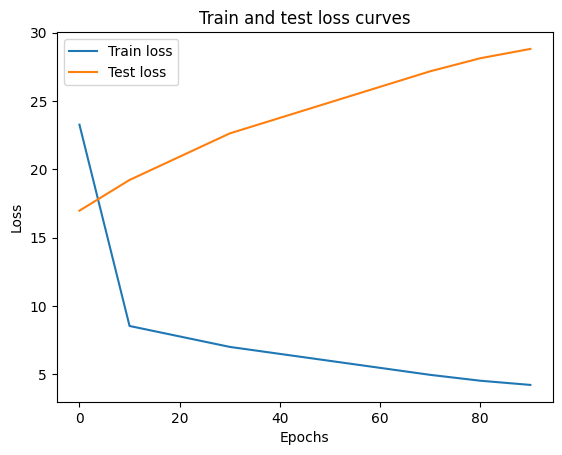

In [11]:
import numpy as np

def plot_loss(epoch_count, train_loss_values, test_loss_values):
    plt.plot(epoch_count, train_loss_values, label='Train loss')
    plt.plot(epoch_count, test_loss_values, label='Test loss')
    plt.title('Train and test loss curves')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
plot_loss(epoch_count, train_loss_values, test_loss_values)

C:\Users\Trung Minh\AppData\Local\Temp\ipykernel_21428\1279099156.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train, y_train, cmap='r', s=4, label='Training data')
C:\Users\Trung Minh\AppData\Local\Temp\ipykernel_21428\1279099156.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_test, y_test, cmap='b', s=4, label='Test data')
C:\Users\Trung Minh\AppData\Local\Temp\ipykernel_21428\1279099156.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_test, predictions, cmap='g', label='Predictions')


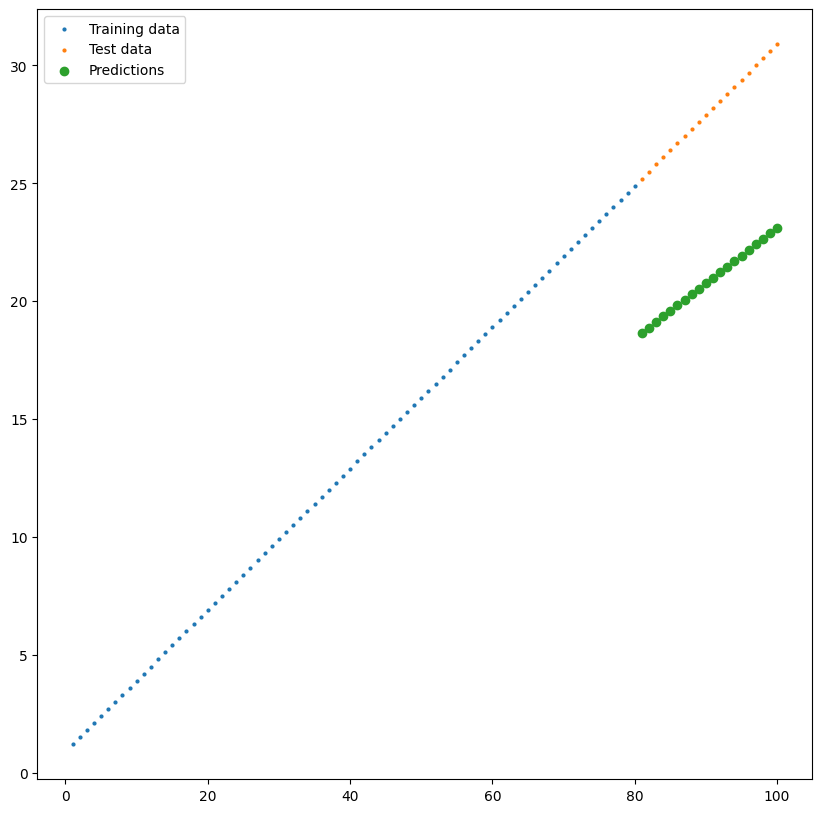

In [12]:
model.eval()
with torch.inference_mode():
    preds = model(x_test)
    
plot_train_test_data(predictions=preds)

In [13]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [14]:
loaded_model = ClassificationModel()

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model.state_dict(), model.state_dict()

C:\Users\Trung Minh\AppData\Local\Temp\ipykernel_21428\1606107899.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH

(OrderedDict([('weight', tensor([0.2349])), ('bias', tensor([-0.3813]))]),
 OrderedDict([('weight', tensor([0.2349])), ('bias', tensor([-0.3813]))]))